In [1]:
import sys
import aa_py
%matplotlib inline
%load_ext autoreload
%autoreload 2
from orbit import *
import json

In [13]:
from run_2comp_cluster_vmaxuniversal import generate_simproperties
s, pmmag, ca = 2., 0.17, 1.0
simprops = generate_simproperties(SegregationParameter=s, propermotionmag=pmmag, flattening=ca,
                                 Nparticles=4e5)

eq = crater2_eq()
solar_reflex = crater2_solarreflex()
pm = np.array([pmmag,0.])+solar_reflex
Eq = np.array([eq[0],eq[1],distance,vlos,pm[0],pm[1]])

# info = json.load(open('/data/jls/m2m/CraterII/fixed_veldisp_10_c20/2comp_cuspplum_nfw_SP_2_PM_-18_-14_ca_10.simlog'))

rs_nfw=simprops['Rscale']
c = simprops['c']
Delta=simprops['Delta']
from nbody_tools import Mvir_NFW, Vmax_NFW

print Mvir_NFW(rs_nfw,c,Delta=Delta)/3.7e9
print Vmax_NFW(rs_nfw,c,Delta=Delta)

R,T = integrate_orbits_backwards(Eq)

print pericentre(R),apocentre(R),count_pericentres(R)
print tidal_radius(pericentre(R),rs_nfw,c=c,Delta=Delta)
print tidal_radius(apocentre(R),rs_nfw,c=c,Delta=Delta)
print mass_loss(pericentre(R),apocentre(R),1,rs_nfw,c=c,Delta=Delta)
print mass_loss_hayashi(pericentre(R),apocentre(R),1,rs_nfw,c=c,Delta=Delta)
print penarrubia_tracks(mass_loss(pericentre(R),apocentre(R),1,rs_nfw,c=c,Delta=Delta))[0]
print period(R,T)

data = pd.read_csv('/data/gaia-eso/jls/m2m/CraterII/vmax_universal/2comp_cuspplum_nfw_SP_%i_PM_%i_ca_10_properties.csv'%(int(s),int(pmmag*100.)))
data_flat = pd.read_csv('/data/gaia-eso/jls/m2m/CraterII/vmax_universal/2comp_cuspplum_nfw_SP_%i_PM_%i_ca_03_properties.csv'%(int(s),int(pmmag*100.)))

IntTime not scaled to correct units! (Gyr). Also dont need to scale results in times for nbody_tools
Scale radius = 0.725
Softening = 0.0515715008184
[ 91.18573636 -31.23338154 -94.55914586  38.18287615  63.73237362
  20.62616672]
Tidal radius =  9.56690433209
Time unit:  0.175927851494
Mass fraction inside r_s =  0.0782796451279
400000.0
Velocity dispersion =  12.6578679301
0.176392982985
0.356132538035
20.0979727798
28.3501420364 135.071421149 6
1.78793500944
9.57025601823
0.216588983629
1.78793500944
0.216588983629
0.465391215677
2.08447857746


1.78793500944
1.78793500944
1.78793500944
1.78793500944
1.78793500944
1.78793500944
2.20969941876
2.20969941876
2.20969941876
2.20969941876
2.20969941876
2.20969941876
1.78793500944


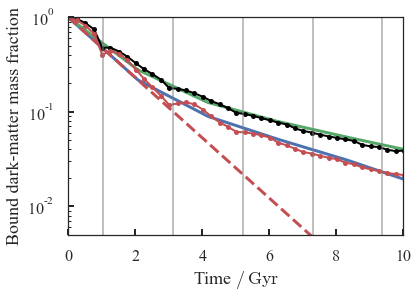

In [10]:
Red = sns.color_palette()[2]
round_kwargs = {'ls':'solid','marker':'o','color':'k','ms':5}
flat_kwargs = {'ls':'solid','marker':'o','color':Red,'ms':5}
nn=np.arange(7)
plt.plot(nn*period(R,T),[mass_loss_hayashi(pericentre(R),apocentre(R),NN,rs_nfw,c=c,Delta=Delta,rlim=0.03*rs_nfw) 
             for NN in nn],lw=3)
plt.plot(nn*period(R,T),[mass_loss_hayashi(pericentre(R)*1.2,apocentre(R),NN,rs_nfw,c=c,Delta=Delta,rlim=0.03*rs_nfw) 
             for NN in nn],lw=3)
plt.plot(nn*period(R,T),[mass_loss(pericentre(R),apocentre(R),NN,rs_nfw,c=c,
                                   Delta=Delta) for NN in nn],ls='dashed',lw=3)
plt.ylim(5e-3,1.)
plt.semilogy()
mbnd = mass_loss_hayashi(pericentre(R),apocentre(R),count_pericentres(R),
                         rs_nfw,c=c,Delta=Delta,rlim=0.03*rs_nfw)
plt.plot(data['times'],data['mass_dm']/data['mass_dm'][0],**round_kwargs);plt.semilogy()
plt.plot(data_flat['times'],data_flat['mass_dm']/data_flat['mass_dm'][0],**flat_kwargs);plt.semilogy()
plt.xlim(0.,10.)
[plt.axvline((P+.5)*period(R,T),color='gray',alpha=0.5) for P in range(count_pericentres(R))]
plt.ylabel(r'Bound dark-matter mass fraction')
plt.xlabel(r'Time $/\,\mathrm{Gyr}$')

1.78793500944
1.78793500944
1.78793500944
1.78793500944
1.78793500944
1.78793500944
1.78793500944


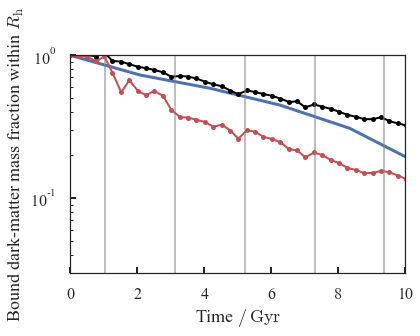

In [4]:
Red = sns.color_palette()[2]
round_kwargs = {'ls':'solid','marker':'o','color':'k','ms':5}
flat_kwargs = {'ls':'solid','marker':'o','color':Red,'ms':5}
nn=np.arange(7)
plt.plot(nn*period(R,T),[mass_loss_hayashi(pericentre(R),apocentre(R),NN,rs_nfw,
                                           c=c,Delta=Delta,rlim=0.03*rs_nfw,rtotal=simprops['rs']) 
             for NN in nn],lw=3)
# plt.plot(nn*period(R,T),[mass_loss(pericentre(R),apocentre(R),NN,rs_nfw,c=c,
#                                    Delta=Delta) for NN in nn],ls='dashed',lw=3)
plt.ylim(0.03,1.)
plt.semilogy()
mbnd = mass_loss_hayashi(pericentre(R),apocentre(R),count_pericentres(R),
                         rs_nfw,c=c,Delta=Delta,rlim=0.03*rs_nfw)
plt.plot(data['times'],data['mass_dm_core']/data['mass_dm_core'][0],**round_kwargs);plt.semilogy()
plt.plot(data_flat['times'],data_flat['mass_dm_core']/data_flat['mass_dm_core'][0],**flat_kwargs);plt.semilogy()
plt.xlim(0.,10.)
[plt.axvline((P+.5)*period(R,T),color='gray',alpha=0.5) for P in range(count_pericentres(R))]
plt.ylabel(r'Bound dark-matter mass fraction within $R_\mathrm{h}$')
plt.xlabel(r'Time $/\,\mathrm{Gyr}$')

1.78793500944
1.78793500944
1.78793500944
1.78793500944
1.78793500944
1.78793500944
1.78793500944


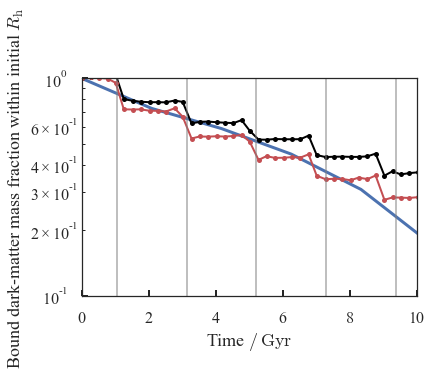

In [5]:
Red = sns.color_palette()[2]
round_kwargs = {'ls':'solid','marker':'o','color':'k','ms':5}
flat_kwargs = {'ls':'solid','marker':'o','color':Red,'ms':5}
nn=np.arange(7)
plt.plot(nn*period(R,T),[mass_loss_hayashi(pericentre(R),apocentre(R),NN,rs_nfw,
                                           c=c,Delta=Delta,rlim=0.03*rs_nfw,rtotal=simprops['rs']) 
             for NN in nn],lw=3)
# plt.plot(nn*period(R,T),[mass_loss(pericentre(R),apocentre(R),NN,rs_nfw,c=c,
#                                    Delta=Delta) for NN in nn],ls='dashed',lw=3)
plt.ylim(1e-1,1.)
plt.semilogy()
mbnd = mass_loss_hayashi(pericentre(R),apocentre(R),count_pericentres(R),
                         rs_nfw,c=c,Delta=Delta,rlim=0.03*rs_nfw)
plt.plot(data['times'],data['mass_dm_core_init']/data['mass_dm_core_init'][0],**round_kwargs);plt.semilogy()
plt.plot(data_flat['times'],data_flat['mass_dm_core_init']/data_flat['mass_dm_core_init'][0],**flat_kwargs);plt.semilogy()
plt.xlim(0.,10.)
[plt.axvline((P+.5)*period(R,T),color='gray',alpha=0.5) for P in range(count_pericentres(R))]
plt.ylabel(r'Bound dark-matter mass fraction within initial $R_\mathrm{h}$')
plt.xlabel(r'Time $/\,\mathrm{Gyr}$')

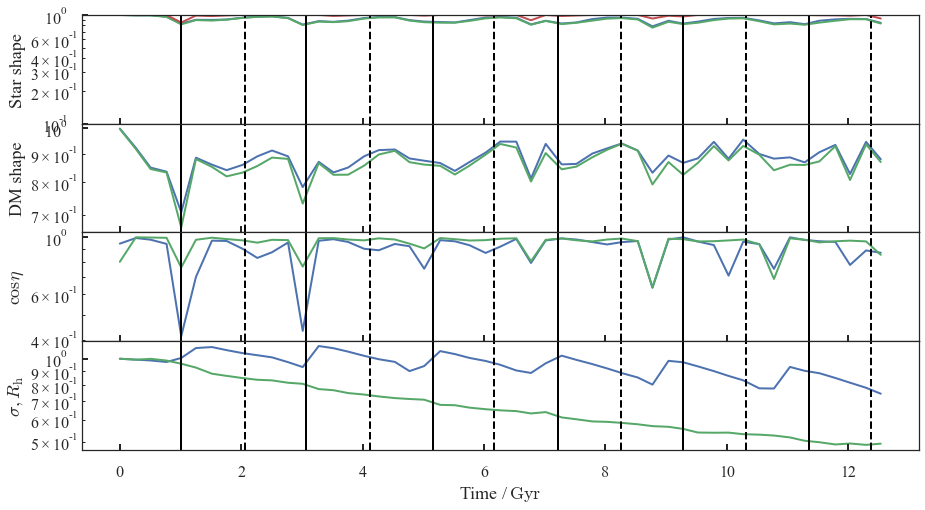

In [6]:
f,a=plt.subplots(4,1,figsize=[15.,8.])
plt.subplots_adjust(hspace=0.)
plt.sca(a[0])
plt.plot(data['times'],data['ba_st']);plt.semilogy()
plt.plot(data['times'],data['ca_st']);plt.semilogy()
plt.plot(data['times'],1.-data['eps']);plt.semilogy()
plt.ylabel('Star shape')
plt.ylim(0.1,1.)
[plt.axvline(v,color='k') for v in peri_times(R,T)]
[plt.axvline(v,color='k',ls='dashed') for v in apo_times(R,T)];
plt.sca(a[1])
plt.plot(data['times'],data['ba_dm']);plt.semilogy()
plt.plot(data['times'],data['ca_dm']);plt.semilogy()
[plt.axvline(v,color='k') for v in peri_times(R,T)]
[plt.axvline(v,color='k',ls='dashed') for v in apo_times(R,T)];
plt.ylabel('DM shape')
plt.sca(a[2])
plt.plot(data['times'],data['align_dm']);plt.semilogy()
plt.plot(data['times'],data['align_st']);plt.semilogy()
[plt.axvline(v,color='k') for v in peri_times(R,T)]
[plt.axvline(v,color='k',ls='dashed') for v in apo_times(R,T)];
plt.ylabel(r'$\cos\eta$')
plt.sca(a[3])
plt.plot(data['times'],data['r_half']/data['r_half'][0]);plt.semilogy()
plt.plot(data['times'],data['sig_maj']/data['sig_maj'][0]);plt.semilogy()
[plt.axvline(v,color='k') for v in peri_times(R,T)]
[plt.axvline(v,color='k',ls='dashed') for v in apo_times(R,T)];
plt.ylabel(r'$\sigma,R_\mathrm{h}$')
plt.xlabel(r'Time /$\,\mathrm{Gyr}$')

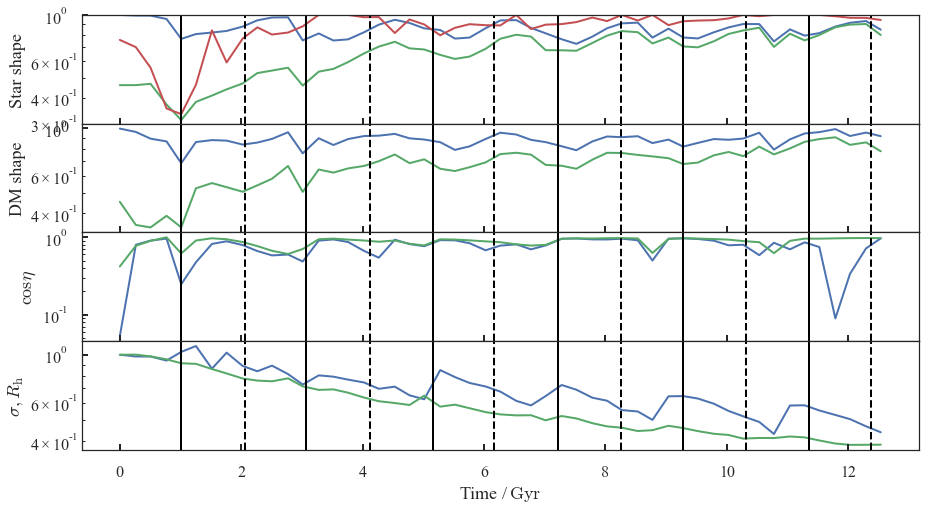

In [7]:
f,a=plt.subplots(4,1,figsize=[15.,8.])
plt.subplots_adjust(hspace=0.)
plt.sca(a[0])
plt.plot(data_flat['times'],data_flat['ba_st']);plt.semilogy()
plt.plot(data_flat['times'],data_flat['ca_st']);plt.semilogy()
plt.plot(data_flat['times'],1.-data_flat['eps']);plt.semilogy()
plt.ylabel('Star shape')
plt.ylim(0.3,1.)
[plt.axvline(v,color='k') for v in peri_times(R,T)]
[plt.axvline(v,color='k',ls='dashed') for v in apo_times(R,T)];
plt.sca(a[1])
plt.plot(data_flat['times'],data_flat['ba_dm']);plt.semilogy()
plt.plot(data_flat['times'],data_flat['ca_dm']);plt.semilogy()
[plt.axvline(v,color='k') for v in peri_times(R,T)]
[plt.axvline(v,color='k',ls='dashed') for v in apo_times(R,T)];
plt.ylabel('DM shape')
plt.sca(a[2])
plt.plot(data_flat['times'],data_flat['align_dm']);plt.semilogy()
plt.plot(data_flat['times'],data_flat['align_st']);plt.semilogy()
plt.ylabel(r'$\cos\eta$')
[plt.axvline(v,color='k') for v in peri_times(R,T)]
[plt.axvline(v,color='k',ls='dashed') for v in apo_times(R,T)];
plt.sca(a[3])
plt.plot(data_flat['times'],data_flat['r_half']/data_flat['r_half'][0]);plt.semilogy()
plt.plot(data_flat['times'],data_flat['sig_maj']/data_flat['sig_maj'][0]);plt.semilogy()
[plt.axvline(v,color='k') for v in peri_times(R,T)]
[plt.axvline(v,color='k',ls='dashed') for v in apo_times(R,T)];
plt.ylabel(r'$\sigma,R_\mathrm{h}$')
plt.xlabel(r'Time /$\,\mathrm{Gyr}$')

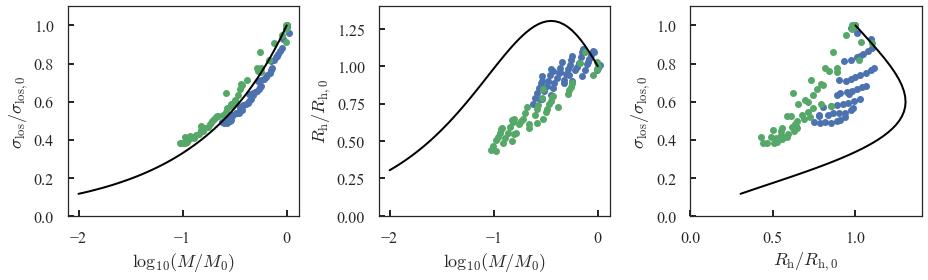

In [8]:
f,a=plt.subplots(1,3,figsize=[13.,4.])
plt.sca(a[0])
plt.plot(np.log10(data['mass_dm_core']/data['mass_dm_core'][0]),data['sig_maj']/data['sig_maj'][0],'.')
plt.plot(np.log10(data_flat['mass_dm_core']/data_flat['mass_dm_core'][0]),
         data_flat['sig_maj']/data_flat['sig_maj'][0],'.')
plt.xlabel(r'$\log_{10}(M/M_\mathrm{0})$')
plt.ylabel(r'$\sigma_\mathrm{los}/\sigma_\mathrm{los,0}$')
xx = np.logspace(-2.,0.)
plt.ylim(0.,1.1)
plt.plot(np.log10(xx),penarrubia_tracks_Mh(xx)[0],color='k')
plt.sca(a[1])
plt.plot(np.log10(data['mass_dm_core']/data['mass_dm_core'][0]),data['r_half']/data['r_half'][0],'.')
plt.plot(np.log10(data_flat['mass_dm_core']/data_flat['mass_dm_core'][0]),
         data_flat['r_half']/data_flat['r_half'][0],'.')
xx = np.logspace(-2.,0.)
plt.ylim(0.,1.4)
plt.plot(np.log10(xx),penarrubia_tracks_Mh(xx)[1],color='k')
plt.xlabel(r'$\log_{10}(M/M_\mathrm{0})$')
plt.ylabel(r'$R_\mathrm{h}/R_\mathrm{h,0}$')
plt.sca(a[2])
plt.plot(data['r_half']/data['r_half'][0],data['sig_maj']/data['sig_maj'][0],'.')
plt.plot(data_flat['r_half']/data_flat['r_half'][0],data_flat['sig_maj']/data_flat['sig_maj'][0],'.')
plt.plot(penarrubia_tracks_Mh(xx)[1],penarrubia_tracks_Mh(xx)[0],color='k')
plt.xlabel(r'$R_\mathrm{h}/R_\mathrm{h,0}$')
plt.ylabel(r'$\sigma_\mathrm{los}/\sigma_\mathrm{los,0}$')
plt.xlim(0.,1.4)
plt.ylim(0.,1.1)
plt.tight_layout()

In [12]:
data['times']*nbody_tools.kms2kpcGyr

0      0.000000
1      0.269890
2      0.517289
3      0.787179
4      1.034580
5      1.281980
6      1.551870
7      1.799270
8      2.069160
9      2.316560
10     2.563960
11     2.833850
12     3.081250
13     3.351140
14     3.598530
15     3.845930
16     4.115820
17     4.363220
18     4.633110
19     4.880510
20     5.127910
21     5.397800
22     5.645200
23     5.892600
24     6.162490
25     6.409890
26     6.679780
27     6.927180
28     7.174580
29     7.444470
30     7.691870
31     7.961760
32     8.209160
33     8.456560
34     8.726450
35     8.973850
36     9.243740
37     9.491130
38     9.738530
39    10.008400
40    10.255800
41    10.503200
42    10.773100
43    11.020500
44    11.290400
45    11.537800
46    11.785200
47    12.055100
48    12.302500
49    12.572400
50    12.819800
Name: times, dtype: float64